### INTRODUCTION

#### Predicting the weight of fish through linear regression
#### Steps taken in preprocessing includes Data cleaning, Assumption check, Outliers Removal, Standardization etc

### SIDE NOTE
#### You can leave your question about any unclear part in the comment section
#### Any correction will be highly welcomed

### LOADING THE DATA

In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
path = '..\..\dataset_git\Fish.csv'

df = pd.read_csv(path)

df.head(3)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961


In [5]:
df.describe(include = 'all')

,Species,Weight,Length1,Length2,Length3,Height,Width
count,159,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
unique,7,NaN,NaN,NaN,NaN,NaN,NaN
top,Perch,NaN,NaN,NaN,NaN,NaN,NaN
freq,56,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,NaN,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,NaN,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,NaN,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,NaN,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,NaN,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500


### DEALING WITH MISSING VALUES

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
Species    159 non-null object
Weight     159 non-null float64
Length1    159 non-null float64
Length2    159 non-null float64
Length3    159 non-null float64
Height     159 non-null float64
Width      159 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


#### This dataset is clean

### DATASET ANALYSIS AND OUTLIERS REMOVAL

#### we will plot the distribution of all  the numeric variables in other to be able to identify outliers and any other abnormalities
#### Outliers will be dealt with by removing either top 1% or the bottom 1%

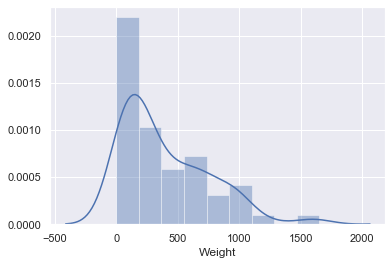

In [7]:
#plotting a distribution plot
sns.distplot(df['Weight']) #we can see those few outliers shown by the longer right tail of the distribution

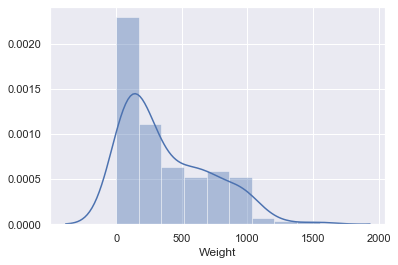

In [8]:
#Removing the top 1% of the observation will help us to deal with the outliers
q = df['Weight'].quantile(0.99)
df = df[df['Weight']<q]

sns.distplot(df['Weight']) 

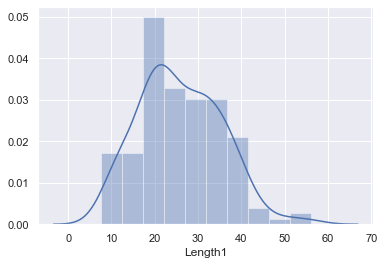

In [9]:
sns.distplot(df['Length1']) #we can see those few outliers shown by the longer right tail of the distribution

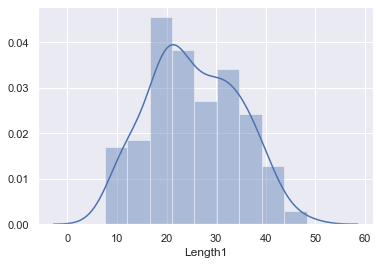

In [10]:
#Removing the top 1% of the observation will help us to deal with the outliers
q = df['Length1'].quantile(0.99)
df = df[df['Length1']<q]

sns.distplot(df['Length1'])

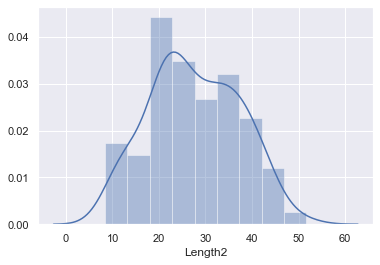

In [11]:
sns.distplot(df['Length2']) #we can see those few outliers shown by the longer right tail of the distribution

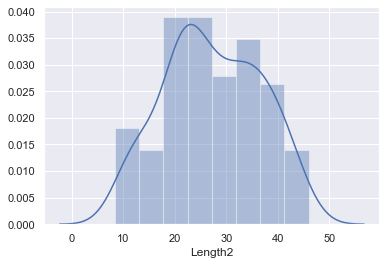

In [12]:
#Removing the top 1% of the observation will help us to deal with the outliers
q = df['Length2'].quantile(0.99)
df = df[df['Length2']<q]

sns.distplot(df['Length2'])

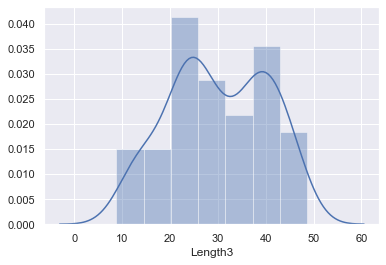

In [13]:
sns.distplot(df['Length3']) #we can see those few outliers shown by the longer right tail of the distribution

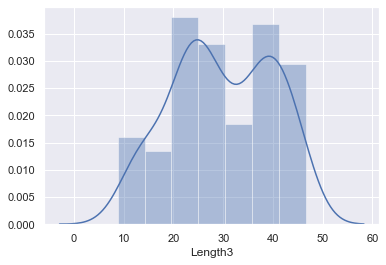

In [14]:
#Removing the top 1% of the observation will help us to deal with the outliers
q = df['Length3'].quantile(0.99)
df = df[df['Length3']<q]

sns.distplot(df['Length3'])

In [15]:
#We need to reset index of the dataframe after droppinh those observation
df.reset_index(drop = True, inplace = True)

In [16]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,360.906623,24.980132,27.072848,29.843709,8.969083,4.333206
std,310.830536,8.435576,9.085703,10.047398,4.388229,1.676490
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.000000,20.900000,22.800000,5.896250,3.338300
50%,265.000000,24.000000,26.500000,28.900000,7.585200,4.204200
75%,600.000000,31.800000,34.750000,38.900000,12.406050,5.362700
max,1100.000000,41.100000,44.000000,46.600000,18.957000,8.142000


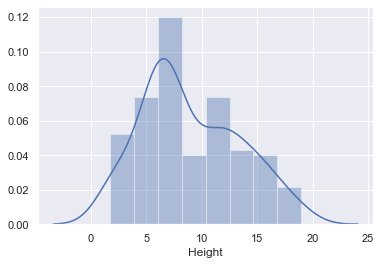

In [17]:
sns.distplot(df['Height']) #we can see those few outliers shown by the longer right tail of the distribution

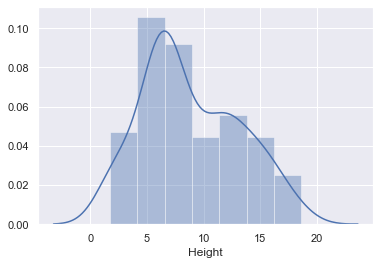

In [18]:
#Removing the top 1% of the observation will help us to deal with the outliers
q = df['Height'].quantile(0.99)
df = df[df['Height']<q]

sns.distplot(df['Height'])

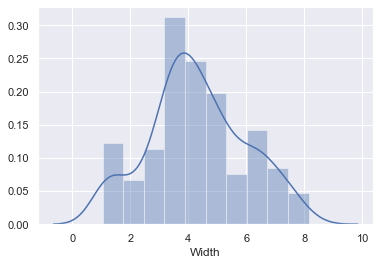

In [19]:
sns.distplot(df['Width']) #we can see those few outliers shown by the longer right tail of the distribution

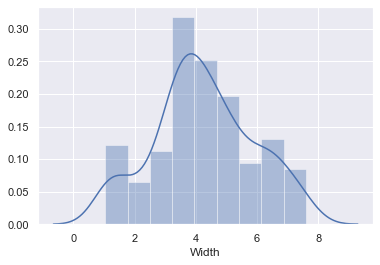

In [20]:
#Removing the top 1% of the observation will help us to deal with the outliers
q = df['Width'].quantile(0.99)
df = df[df['Width']<q]

sns.distplot(df['Width'])

In [21]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,345.114966,24.691156,26.755102,29.491156,8.792707,4.251862
std,299.440946,8.348119,8.983235,9.933346,4.275482,1.619938
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.000000,20.750000,22.650000,5.865500,3.323300
50%,250.000000,24.000000,26.000000,28.900000,7.405200,4.158000
75%,548.000000,31.450000,34.000000,38.650000,12.365900,5.279300
max,1100.000000,41.100000,44.000000,46.600000,18.635400,7.595800


### ASSUMPTION CHECK
### 1.The first assumption we will check is No multicollinearity
#### The minimum variance inflation factor(vif) will be 10

In [22]:
df.columns.values

array(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'], dtype=object)

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# the target column (in this case 'weight') should not be included in variables
#Categorical variables already turned into dummy indicator may or maynot be added if any
variables = df[['Length1', 'Length2', 'Length3', 'Height','Width']]
X = add_constant(variables)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1]) ]
vif['features'] = X.columns
vif

C:\Users\ABOLARIN BUKOLA\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,VIF,features
0,11.363704,const
1,1160.000094,Length1
2,1447.868681,Length2
3,297.012915,Length3
4,15.056790,Height
5,13.626161,Width


#### from the table above 'Length1' and  'Length2' are highly correlated with the rest of variables.
#### Let's drop them and run the code again

In [24]:
df.drop(['Length1','Length2'], axis = 1, inplace = True)

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

variables = df[['Length3', 'Height','Width']]
X = add_constant(variables)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1]) ]
vif['features'] = X.columns
vif

,VIF,features
0,10.332900,const
1,7.339804,Length3
2,3.297824,Height
3,7.160986,Width


#### After dropping those variables and running the code again the result shows that Non of the variables are having a vif >= 10

### 2.The next assumption we will like to check is LINEARITY
#### Let's plot each numerical variable against our target variable 'Weight' and check to see if the resulting plot is linear

Text(0.5, 1.0, 'Width and weight')

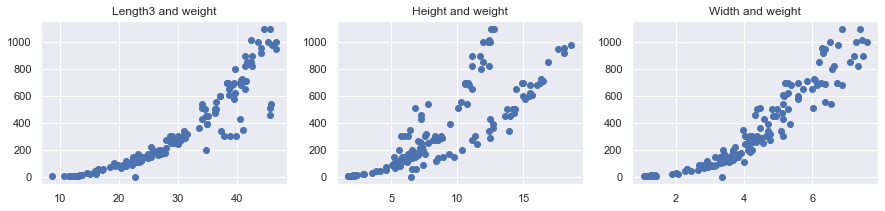

In [26]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize =(15,3))
ax1.scatter(df['Length3'], df['Weight'])
ax1.set_title('Length3 and weight')

ax2.scatter(df['Height'], df['Weight'])
ax2.set_title('Height and weight')

ax3.scatter(df['Width'], df['Weight'])
ax3.set_title('Width and weight')

####  The resulting plots above gives us a rather curve line
#### Let's try to correct this by taking the log of  our target variable 'Weight'

In [27]:
#Creating a new column in our dataset containing log-of-weight
df['log_weight'] = np.log(df['Weight'])

C:\Users\ABOLARIN BUKOLA\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Width and log_weight')

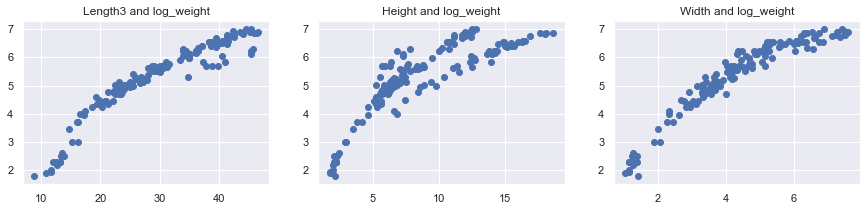

In [28]:
#RE plotting the graphs but this time using 'log_weight' as our target variable
fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize =(15,3))
ax1.scatter(df['Length3'], df['log_weight'])
ax1.set_title('Length3 and log_weight')

ax2.scatter(df['Height'], df['log_weight'])
ax2.set_title('Height and log_weight')

ax3.scatter(df['Width'], df['log_weight'])
ax3.set_title('Width and log_weight')

#### The above plots till leads to a not so straight line, next we take the log of the numerical variables

In [29]:
#Creating new columns to hold the logs of the variables
df['log_length3'] = np.log(df['Length3'])

df['log_width'] = np.log(df['Width'])

df['log_height'] = np.log(df['Height'])

Text(0.5, 1.0, 'log_height and log_weight')

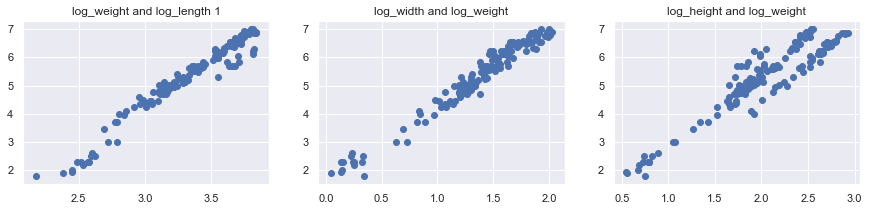

In [30]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize =(15,3))
ax1.scatter(df['log_length3'], df['log_weight'])
ax1.set_title('log_weight and log_length 1')
ax2.scatter(df['log_width'], df['log_weight'])
ax2.set_title('log_width and log_weight')
ax3.scatter(df['log_height'], df['log_weight'])
ax3.set_title('log_height and log_weight')

#### The above graph gives a straight line plot Therefore our Linearity assumption as been satified
### 3. The next assumption to check is Normality and Homoscedasticity
#### Normality is assumed while from the last graphs we can see that homoscedasticity as been achieved



#### We are going to use the new log columns we created inplace of the former variables so let's drop those former variables

In [31]:
#Getting the present variables in our dataframe
df.columns.values

array(['Species', 'Weight', 'Length3', 'Height', 'Width', 'log_weight',
       'log_length3', 'log_width', 'log_height'], dtype=object)

In [32]:
#Dropping those columns that as been logged
df = df.drop(['Length3', 'Height', 'Width', 'Weight'], axis = 1)

In [33]:
df.describe()

,log_weight,log_length3,log_width,log_height
count,147.000000,147.000000,147.000000,147.000000
mean,-inf,3.318205,1.356207,2.033067
std,NaN,0.382190,0.464544,0.572200
min,-inf,2.174752,0.046502,0.547196
25%,4.787492,3.120138,1.200958,1.769086
50%,5.521461,3.363842,1.425034,2.002182
75%,6.306169,3.654546,1.663794,2.514942
max,7.003065,3.841601,2.027595,2.925063


#### From the the table above log_weight seems to have a minimum value of -inf(infinity) which is useless
#### Let's locate and drop the row having the -inf value

In [34]:
df[df['log_weight'].apply(lambda x: x < 1000)].sort_values('log_weight', ascending = True)

,Species,log_weight,log_length3,log_width,log_height
40,Roach,-inf,3.126761,1.209438,1.867979
72,Perch,1.774952,2.174752,0.342170,0.747635
137,Smelt,1.902108,2.379546,0.046502,0.553195
139,Smelt,1.945910,2.451005,0.138370,0.547196
138,Smelt,2.014903,2.451005,0.148420,0.679048
...,...,...,...,...,...
60,Whitefish,6.907755,3.772761,1.875641,2.513980
124,Perch,6.907755,3.811097,1.984746,2.479291
121,Perch,6.922644,3.747148,2.009877,2.516147
123,Perch,7.003065,3.797734,1.926931,2.549461


In [35]:
#Drop a row with index number 40
df.drop([40], inplace = True)

#Resetting the index after dropping a row
df.reset_index(drop = True, inplace = True)

### Dummy Variables
#### Species is a categorical variable so we need  to turn it into a dummy indicator before we can perform our regression

In [36]:
df = pd.get_dummies(df, drop_first = True)

In [37]:
df.head()

,log_weight,log_length3,log_width,log_height,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,5.488938,3.401197,1.391282,2.444085,0,0,0,0,0,0
1,5.669881,3.440418,1.459917,2.524127,0,0,0,0,0,0
2,5.828946,3.437208,1.546732,2.515905,0,0,0,0,0,0
3,5.894403,3.511545,1.494139,2.543961,0,0,0,0,0,0
4,6.063785,3.526361,1.635885,2.521239,0,0,0,0,0,0


### Standardization

#### Standardizing helps to give our independent varibles a more standard and relatable numeric scale, it also helps in improving model accuracy

In [38]:
#Declaring independent variable i.e x
#Declaring Target variable i.e y
y = df['log_weight']
x = df.drop(['log_weight'], axis = 1)

In [39]:
scaler = StandardScaler() #Selecting the standardscaler
scaler.fit(x)#fitting our independent variables

StandardScaler(copy=True, with_mean=True, with_std=True)

In [40]:
scaled_x = scaler.transform(x)#scaling

### MULTIPLE LINEAR REGRESSION
#### It is time to create our model
#### We will split our dataframe into two, one part for training the other for testing

In [41]:
#Splitting our data into train and test dataframe
x_train,x_test, y_train, y_test = train_test_split(scaled_x, y , test_size = 0.2, random_state = 47)

In [42]:
reg = LinearRegression()#Selecting our model
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
#predicting using x_train
y_hat = reg.predict(x_train)

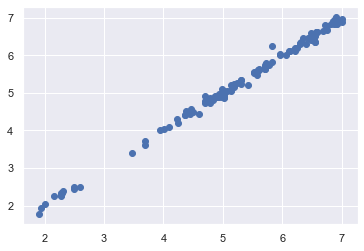

In [44]:
#Plotting y_train vs our predicted value(y_hat)
fig, ax = plt.subplots()
ax.scatter(y_train, y_hat)

#### From the plot above we can see that our model was pretty decent in predicting 
### 4. No Endogeneity assumption
#### Lets plot the residual graph to check for No Endogeneity assumption

Text(0.5, 1.0, 'Residual Graph')

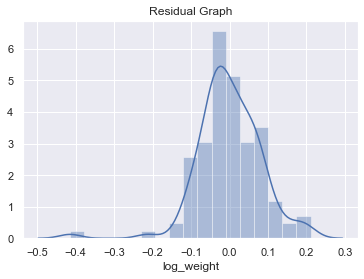

In [45]:
#Residual graph
sns.distplot(y_train - y_hat)
plt.title('Residual Graph')

#### Our graph generally shows a normal distribution but with a  longer left tail and a sligthly longer right tail
#### which means that our model tends to over estimate the target(a much higher value is predicted) a lot

In [46]:
#R2
reg.score(x_train, y_train)

0.9962105774646387

#### Our model is explaining 99.5% of the variabilty of the data which is quite excellent

In [47]:
#Intercept of the regression line
reg.intercept_

5.290655929521912

In [48]:
#Coefficient
reg.coef_

array([0.6159191 , 0.2871849 , 0.41868436, 0.03017353, 0.11550548,
       0.03264412, 0.03575196, 0.00950076, 0.0516536 ])

In [49]:
#Predicting with x_test
y_hat_test = reg.predict(x_test)

In [50]:
reg.score(x_test, y_test)

0.993927512101692

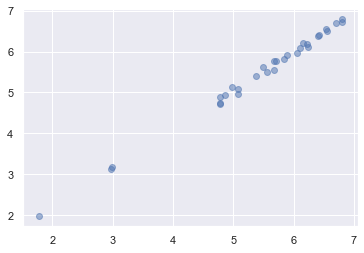

In [51]:
#Plotting predicted value against y_test
plt.scatter(y_test, y_hat_test, alpha=0.5)
plt.show()

####  This plot shows that our model prediction is quite close to the expected values with an R2 of 99.3%

### WEIGHT INTERPRETATION

In [52]:
#Creating a summary table containing coefficients for each variable
summary = pd.DataFrame( data = x.columns.values, columns = ['Features'] )
summary['Weight'] = reg.coef_
summary

,Features,Weight
0,log_length3,0.615919
1,log_width,0.287185
2,log_height,0.418684
3,Species_Parkki,0.030174
4,Species_Perch,0.115505
5,Species_Pike,0.032644
6,Species_Roach,0.035752
7,Species_Smelt,0.009501
8,Species_Whitefish,0.051654


#### Considering the summary table the higher the weight the higher the impact that means log_length3 is the most impactful feature
#### A positive weight shows an increase in log_weight and weight respectively
#### A negative weight shows a decrease in log_weight and weight respectively

### CONCLUSION
#### Let's take a closer look at the expected and predicted values

In [53]:
#Creating a new dataframe
df1 = pd.DataFrame( data = np.exp(y_hat_test), columns = ['Predictions'] )

In [54]:
#Resetting index to match the index of y_test with that of the dataframe
y_test = y_test.reset_index(drop = True)

In [55]:
#target column will hold our predicted values
df1['target'] = np.exp(y_test)


In [56]:
#Substrating predictions from target to get the difference in value
df1['Residual'] = df1['target'] - df1['Predictions']

#Difference in percentage
df1['Difference%'] = np.absolute(df1['Residual']/ df1['target'] * 100)

In [57]:
df1.describe()

,Predictions,target,Residual,Difference%
count,30.000000,30.000000,30.000000,30.000000
mean,357.615134,362.983333,5.368199,7.486182
std,251.303210,260.655004,24.194120,5.794146
min,7.249956,5.900000,-32.041422,1.090294
25%,147.373265,148.750000,-10.590449,2.816594
50%,319.525468,295.000000,5.933096,6.077233
75%,497.616138,507.500000,13.666074,11.084428
max,886.453009,900.000000,64.642731,22.880604


#### Our minimum Difference in % is 1.09 while our maximum is 22.88

In [58]:
df1.sort_values('Difference%')

,Predictions,target,Residual,Difference%
8,162.755373,161.0,-1.755373,1.090294
22,809.145197,820.0,10.854803,1.323756
20,886.453009,900.0,13.546991,1.505221
0,442.581859,450.0,7.418141,1.648476
5,596.834061,610.0,13.165939,2.158351
9,586.636255,600.0,13.363745,2.227291
23,223.606234,218.0,-5.606234,2.571667
26,486.294231,500.0,13.705769,2.741154
29,334.501938,345.0,10.498062,3.042916
7,374.310594,363.0,-11.310594,3.115866


####  We notice that  from the table above the values with the highest Diffence% have both negative and positive residual values
#### That can also mean that our model tends both overestimate and underestimate its target
#### Over all our model is a very good model

#### If you find this notebook useful don't forget to upvote. #Happycoding